# Jason Samuel Suwito

## Data Analysis Pipeline
1. Data Import / Loading
    * Retrieve data from source (Kaggle.com)
    * Check files type
    * Check delimiters
    * Check the column names and its purpose
    * Load the data into Jupyter Notebook using `pandas.read_csv(url_or_path_to_csv_file)`
2. Data Cleaning
    * Drop columns that are not relevant to the research question
    * Drop rows that have missing values using `dropna()`
3. Data Processing
    * RQ1:
        * Create a new sub-dataset based on grouping the `age` variable.
        * The `groupby` process should take the mean of other quantitative variables aside from the `age` variable.
        * Deal with outliers
    * RQ2:
        * Create a new text column based on classifying the BMI values based on a specified range of values (`bins`).
        * Create a new numerical column based on classifying the BMI values based on a specified range of values (`bins`).
        * Deal with outliers
4. Data Wrangling
    * RQ1:
        * Merge the all the datasets together into one big dataset consisting of the `bmi`, `charges`, and `hours.per.week` based on age.
    * Restructure data (rename columns) to make a clearer dataframe
5. Exploratory Data Analysis
    * Create appropriate plots based on the research question.
    * Edit plot elements (title, x-axis labels, y-axis labels, colour, and size) to better represent the data and make the data visualization more conclusive.

## Research Questions

#### **To what extent does the correlation exist between BMI, Health Care Cost, and Work Hours per week?**
I will create a pair plot for the three relationships: BMI vs Health Care Cost, BMI vs Work Hours per Week, and Health Care Cost vs Work Hours per Week. For each of the relationships, I will analyze the correlation coefficient value to see the level of correlation between the independent and dependent variables. A high correlation coefficient will indicate that there is a strong relationship between the independent and dependent variables while a low correlation coefficient value will indicate that the relationship is weak. 

#### **How does age is distributed in each BMI Classifications?**
For this question, I will create a violin plot with the x-axis representing the BMI Classification and the y-axis representing age. Sub questions for this research question may include the involvement of other variables such as sex, smoker status, region, and number of children. Using these plots, it is possible to see the distribution of age in each BMI classification based on controlled variables

## Data Import, Cleaning, Processing, and Wrangling
> This section serves for importing resources, packages, and python functions that are located in a separate file. The python functions includes method chains for data import, cleaning, processing, and wrangling. Using python functions and method chains allows these processes to be applied more effectively and to avoid redundancy in the main notebook. The last line of this section is used to export the processed data into a csv file to create a seamless integration with Tableau in Milestone 5.

In [32]:
# Import resources and packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Import functions
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions2
else:
    import sys
    sys.path.append("./code")
    import project_functions2

In [34]:
# Data import, cleaning, processing, and wrangling for Research Question 1:
health = project_functions2.load_process_clean_medical_no_sex("../data/raw/medical_expense.csv")
health1 = project_functions2.wrangle_medical(health)
income = project_functions2.load_process_clean_income("../data/raw/adult_income.csv")
income1 = project_functions2.wrangle_income(income)
RQ1 = pd.merge(health1, income1, how='inner', on='Age')

In [35]:
# Data import, cleaning, processing, and wrangling for Research Question 2:
health = project_functions2.load_process_clean_medical("../data/raw/medical_expense.csv")
health1 = project_functions2.categorize_bmi(health)
RQ2 = health1

In [36]:
# Processed data export for Milestone 5:
RQ1.to_csv('../data/processed/jasonrq1.csv')
RQ2.to_csv('../data/processed/jasonrq2.csv')

## Exploratory Data Analysis:
> This section serves for data analysis and plot creation. It is organized based on research questions and sub questions. At the end of every research question, there is an explanation of observations that can be derived from the plots

### Research Question 1: To what extent does the correlation exist between BMI, Health Care Cost, and Work Hours per week?

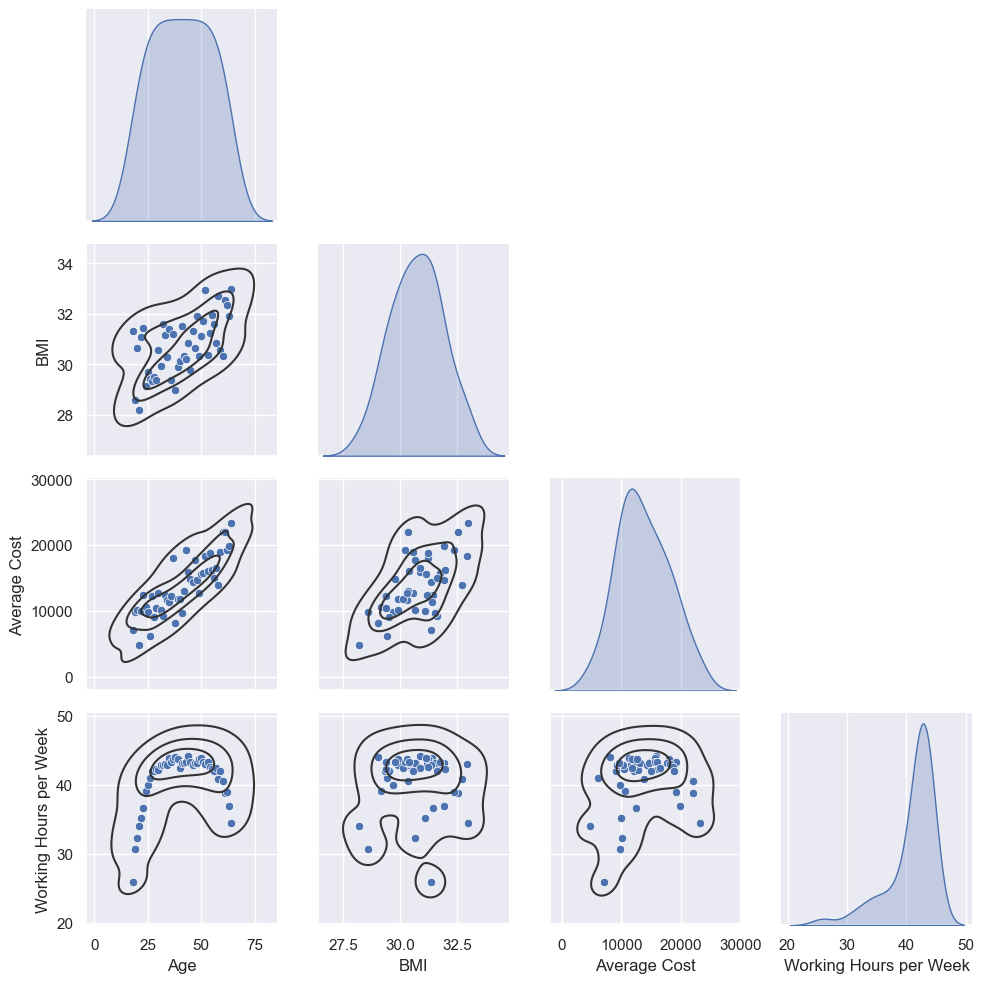

Correlation Coefficient of Average BMI vs Average Healthcare Cost =  0.5890469620333684
Correlation Coefficient of Average BMI vs Average Working Hours per Week =  0.006338974388002727
Correlation Coefficient of Average Healthcare Cost vs Average Working Hours per Week =  0.20287856564505546


In [37]:
p1 = sns.pairplot(RQ1, corner=True, diag_kind="kde")
p1.map_lower(sns.kdeplot, levels=4, color=".2")
plt.tight_layout()
plt.show()
BMIvsCost_coeff = RQ1['BMI'].corr(RQ1['Average Cost'])
print("Correlation Coefficient of Average BMI vs Average Healthcare Cost = ", BMIvsCost_coeff)
BMIvsHours_coeff = RQ1['BMI'].corr(RQ1['Working Hours per Week'])
print("Correlation Coefficient of Average BMI vs Average Working Hours per Week = ", BMIvsHours_coeff)
CostvsHours_coeff = RQ1['Average Cost'].corr(RQ1['Working Hours per Week'])
print("Correlation Coefficient of Average Healthcare Cost vs Average Working Hours per Week = ", CostvsHours_coeff)

#### Observations for Research Question 1:
There is a slight correlation that exist between Average BMI and Average Healthcare Cost. Referring to the pairplot, there is a positive linear relationship between BMI and Average Healthcare Cost which means that as BMI increases, the Average Healthcare cost tends to increase. The linear relationship is supported by the correlation coefficient of `0.5890469620333684` between Average BMI and Average Healthcare Cost. On the other hand, it is not possible to conclude if there exist a relationship between Average BMI and Average Working Hours per Week from the plot. This finding is also supported with the low correlation coefficient of `0.006338974388002727` between Average BMI and Average Working Hours per Week which signifies that there is no relationship between the two variables. Similar to Average BMI vs Average Working Hours per Week, it is not possible to conclude if there exist a relationship between Average Healthcare Cost and Average Working Hours per Week since the plot is inconclusive and the correlation coefficient is very low with a value of `0.20287856564505546`.

### Research Question 2: How does age is distributed in each BMI Classifications?

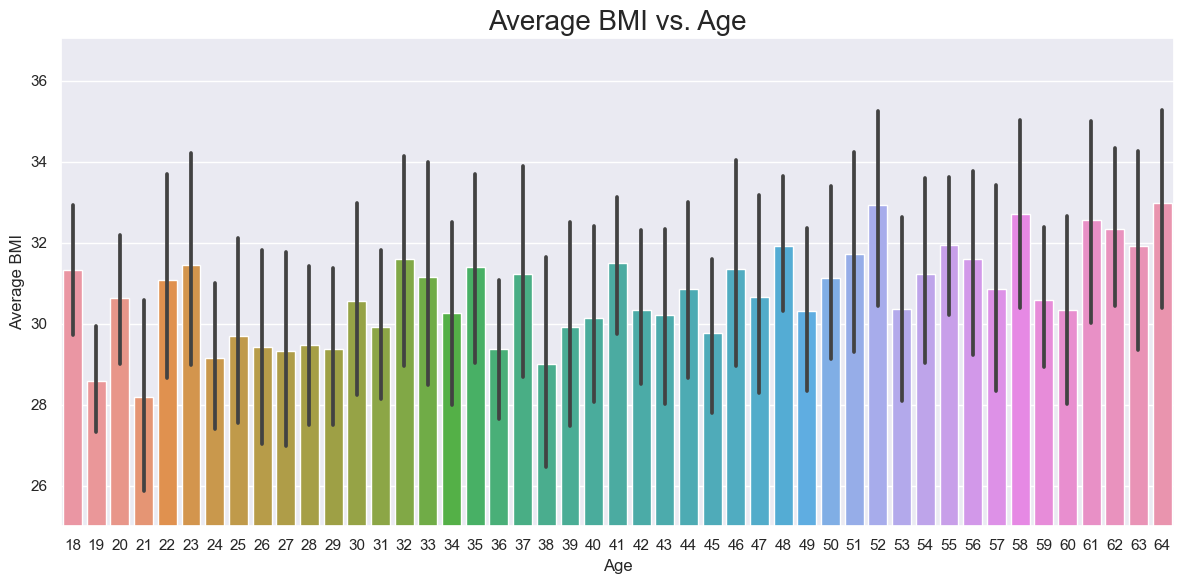

In [38]:
sns.set(rc={'figure.figsize':(12,6)})
p2 = sns.barplot(data=RQ2, x='age', y='bmi')
p2.set_title("Average BMI vs. Age", size = 20)
p2.set_ylabel("Average BMI")
p2.set_xlabel("Age")
p2.set(ylim=(25, None))
plt.tight_layout()
plt.show()

#### Observations for Average BMI vs Age Barplot:
From the bar plot, it is possible to see that the age that has the lowest Average BMI would be the age of 21 while the age that has the highest BMI would be the age of 51. Other than that, there is no significant pattern that can be derived from the bar plot. Thus, it is important to have sub questions to inestigate the distribution of age in each BMI classifications.

#### Research Question 2 - Sub Question 1: Does sex affect the distribution of age for each BMI category?

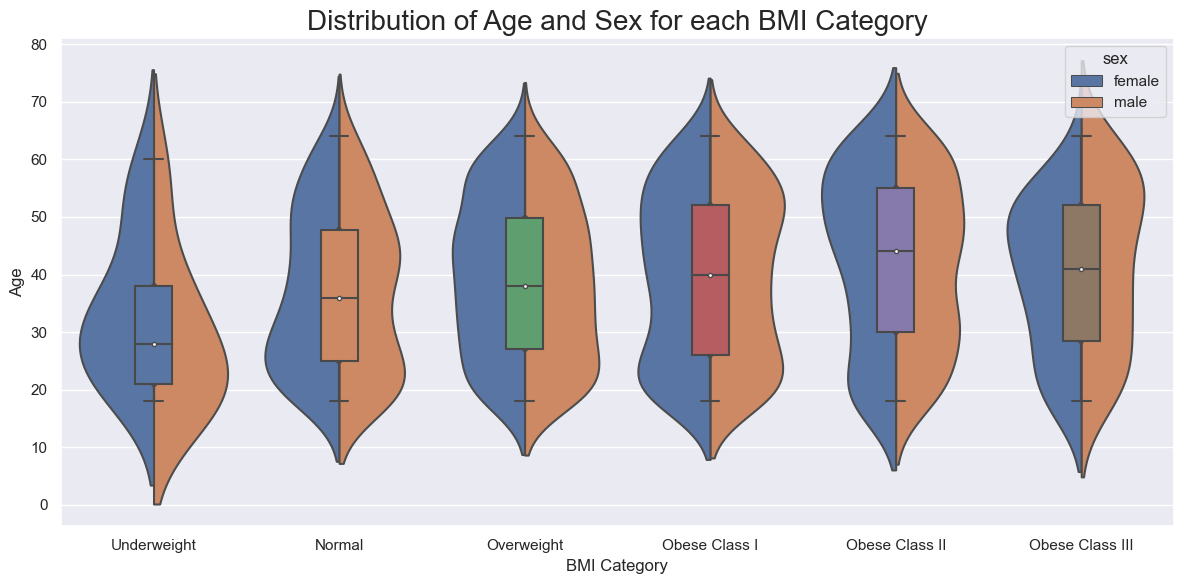

In [39]:
p3 = sns.violinplot(data=health1, x='BMI_cat', y='age', hue='sex', split=True)
sns.boxplot(data=health1, x='BMI_cat', y='age', width=0.2, boxprops={'zorder': 2}, ax=p3)
p3.set_title("Distribution of Age and Sex for each BMI Category", size = 20)
p3.set_ylabel("Age")
p3.set_xlabel("BMI Category")
plt.tight_layout()
plt.show()

#### Observations for Sub Question 1:
Overall, it can be seen that there is a shift on the peak of the graph as the BMI Category progresses from Underweight to Obese Class II. This finding is supported by the median line of the box and whisker plot which shows that there is a shift in the age median as the BMI Category progresses from Underweight to Obese Class II. Thus, there may be a positive linear relationship between Age and BMI which implies that as age increases, BMI also increases. Looking at the sex hue, there is a slight difference on the distribution of age in each BMI category between female and male. For instance, in the underweight classification, Male tend to be younger compared to female. In the Obsese Class III classification, Male tend to be older compared to female. This shows that sex does affect the distribution of age for each BMI category.

#### Research Question 2 - Sub Question 2: Does smoker's status affect the distribution of age for each BMI category?

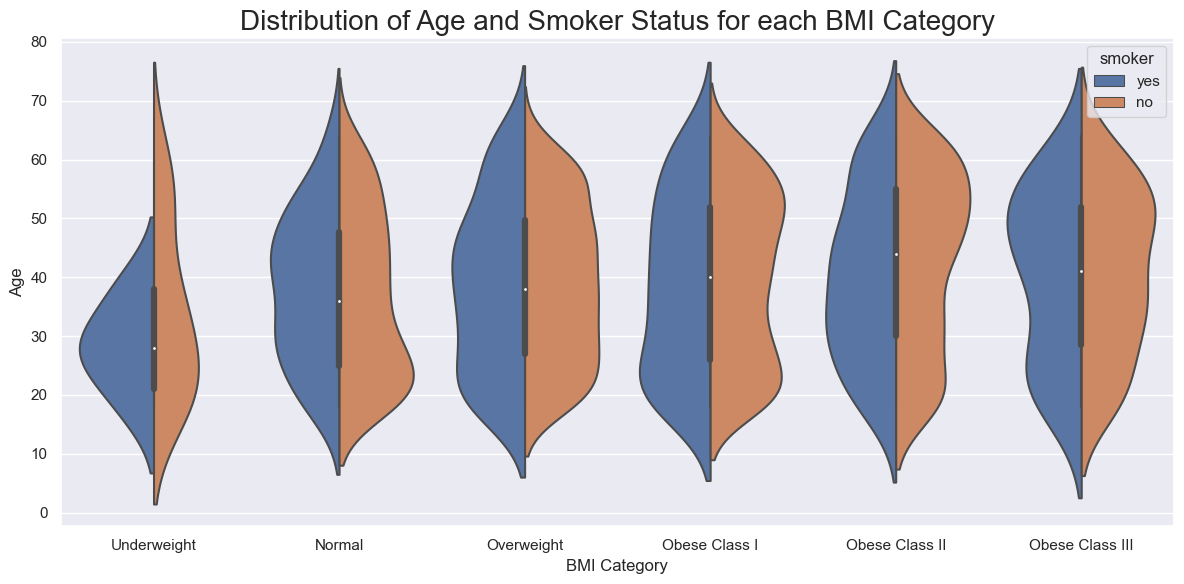

In [40]:
p4 = sns.violinplot(data=health1, x='BMI_cat', y='age', hue='smoker', split=True)
p4.set_title("Distribution of Age and Smoker Status for each BMI Category", size = 20)
p4.set_ylabel("Age")
p4.set_xlabel("BMI Category")
plt.tight_layout()
plt.show()

#### Observations for Sub Question 2:
Looking at the smoker status hue, there is a slight difference on the distribution of age in each BMI category between smokers and non smokers. Non-smokers tend to have a positive shift in the distribution of age as the BMI category progresses. This implies that non-smokers follows the positive linear trend between age and BMI. However, for smokers, there is no observed pattern on the shift of age distribution in each BMI category. Thus smoker's status does affect the distribution of age in each BMI category.

#### Research Question 3 - Sub Question 3: Does region affect the distribution of age for each BMI category?

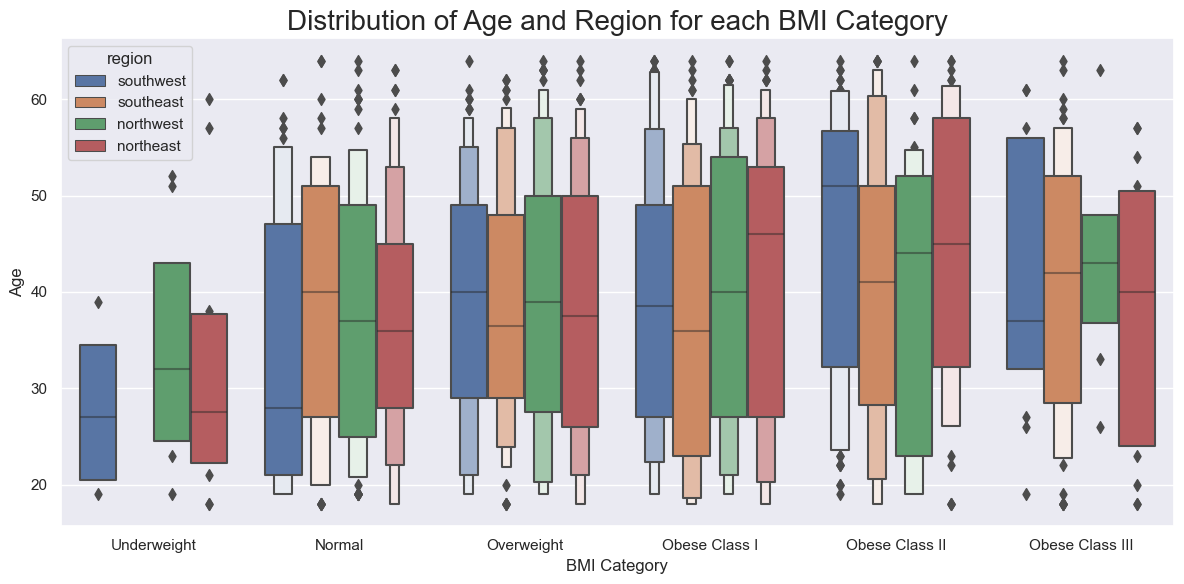

In [41]:
p5 = sns.boxenplot(data=health1, x="BMI_cat", y="age", hue="region")
p5.set_title("Distribution of Age and Region for each BMI Category", size = 20)
p5.set_ylabel("Age")
p5.set_xlabel("BMI Category")
plt.tight_layout()
plt.show()

#### Observations for Sub Question 3:
Looking at the Region hue, there is a difference on the distribution of age in each BMI category between the four regions in the United States. Since there is no data for the underweight BMI category in the southeast region, that category will be excluded from this sub question analysis. There is no pattern that can be observed for the distribution of age and BMI category in teh southern regions. However, in the northern regions, there is an positive shift in the age distribution as the BMI category progresses. Furthermore, it is observed that each region does have a different age distribution for each BMI category. Thus, region does affect the distribution of age for each BMI category.

## Conclusion

Overall, it is possible to conclude that there is a positive linear relationship between BMI and Average Healthcare Cost and that there is also a positive linear relationship between Age and BMI. Younger individuals tend to have a lower BMI and thus be classified in low BMI classifications such as Underweight and Normal. As the individuals grow older, their BMI classification tends to progresses linearly alongside with their age. Furthermore, it also found that sex, smoker status, and region does affect the distribution of age in BMI category. Males tend to have a drastic shift while females tend to have a more subtle shift in the age distribution as the BMI category progresses. Non-smokers tend to have a positive shift in the age distribution as the BMI category progresses. Individuals who lived in the northern territories of the United States tend to have a similar positive shift in the age distribution as the BMI category progresses. A possible explanation to all of these observation is the difference of lifestyle and diets that individuals have. Males may have different diets with females, smokers have different lifestyle as non-smokers, and individuals who lived in the US northern territories may have different diets with individuals who lived in the US southern territories. These different diets affects BMI and thus affect the observations that exist in this analysis.

## Export Plot as Images

In [42]:
p1.figure.savefig('../images/JasonRQ1.png')
p2.figure.savefig('../images/JasonRQ2.png')
p3.figure.savefig('../images/JasonRQ2SQ1.png')
p4.figure.savefig('../images/JasonRQ2SQ2.png')
p5.figure.savefig('../images/JasonRQ2SQ3.png')